In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [ ]:
train_data_path = "./Data/dataset_with_terrain_new_train_2014_2021.csv"
train_data = pd.read_csv(train_data_path)
test_data_path = "./Data/dataset_with_terrain_new_test_2022_2025.csv"
test_data = pd.read_csv(test_data_path)
full_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)

In [ ]:
full_data['tmmx_mean_rt_50_59'].describe()

count    125855.000000
mean        294.844333
std           8.946984
min         254.020000
25%         288.900000
50%         295.480000
75%         301.580000
max         320.790000
Name: tmmx_mean_rt_50_59, dtype: float64

In [ ]:
full_data['season'].describe()

count     125855
unique         4
top       Summer
freq       39649
Name: season, dtype: object

In [ ]:
full_data['baseline_pred_temp'] = (full_data['tmmx_mean_rt_50_59'] > 300).astype(int)
accuracy = accuracy_score(full_data['Wildfire_bin'], full_data['baseline_pred_temp'])
precision = precision_score(full_data['Wildfire_bin'], full_data['baseline_pred_temp'])
recall = recall_score(full_data['Wildfire_bin'], full_data['baseline_pred_temp'])
f1 = f1_score(full_data['Wildfire_bin'], full_data['baseline_pred_temp'])
print("Baseline Model Statistics with Temperature as the parameter on FULL Data")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Baseline Model Statistics with Temperature as the parameter on FULL Data
Accuracy: 0.601883119462874
Precision: 0.2824710541583634
Recall: 0.34079980522247244
F1 Score: 0.30890608405401304


Confusion Matrix with Temperature as the parameter on FULL Data:
 [[64552 28445]
 [21660 11198]]


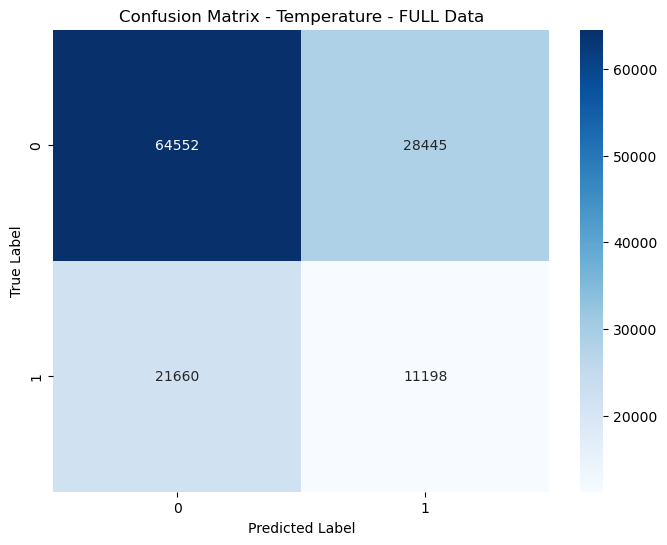

In [ ]:
cm = confusion_matrix(full_data['Wildfire_bin'], full_data['baseline_pred_temp'])
print("Confusion Matrix with Temperature as the parameter on FULL Data:\n", cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Temperature - FULL Data')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
test_data['baseline_pred_temp'] = (test_data['tmmx_mean_rt_50_59'] > 300).astype(int)
accuracy = accuracy_score(test_data['Wildfire_bin'], test_data['baseline_pred_temp'])
precision = precision_score(test_data['Wildfire_bin'], test_data['baseline_pred_temp'])
recall = recall_score(test_data['Wildfire_bin'], test_data['baseline_pred_temp'])
f1 = f1_score(test_data['Wildfire_bin'], test_data['baseline_pred_temp'])
print("Baseline Model Statistics with Temperature as the parameter on TEST Data")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Baseline Model Statistics with Temperature as the parameter on TEST Data
Accuracy: 0.49038758096021384
Precision: 0.6162089752176825
Recall: 0.32560608741815605
F1 Score: 0.42607386824128746


Confusion Matrix with Temperature as the parameter on TEST Data:
 [[5860 2292]
 [7622 3680]]


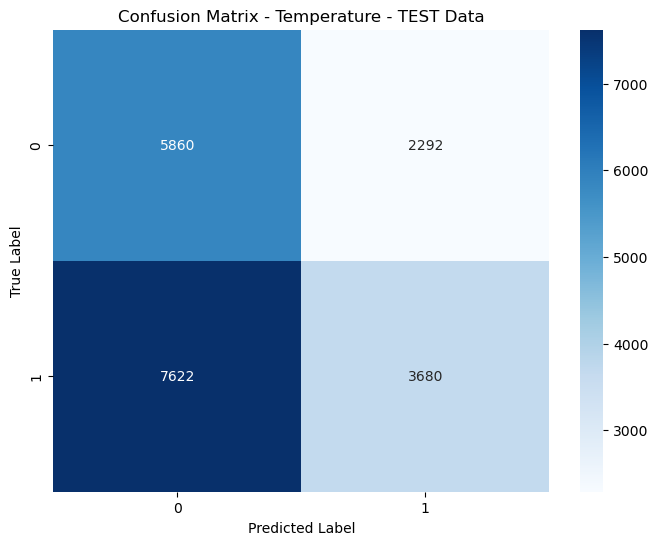

In [ ]:
cm = confusion_matrix(test_data['Wildfire_bin'], test_data['baseline_pred_temp'])
print("Confusion Matrix with Temperature as the parameter on TEST Data:\n", cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Temperature - TEST Data')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

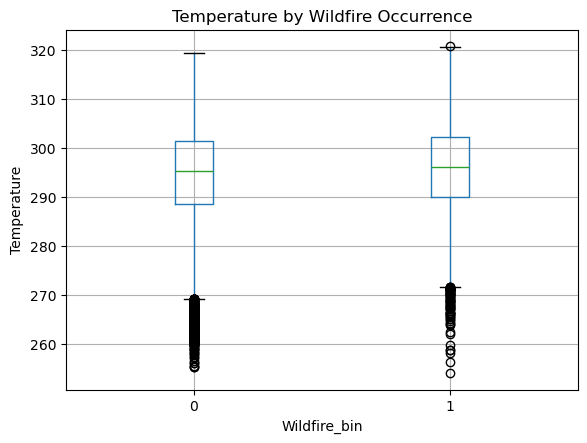

In [ ]:
full_data.boxplot(column='tmmx_mean_rt_50_59', by='Wildfire_bin')
plt.title("Temperature by Wildfire Occurrence")
plt.suptitle("")
plt.xlabel("Wildfire_bin")
plt.ylabel("Temperature")
plt.show()

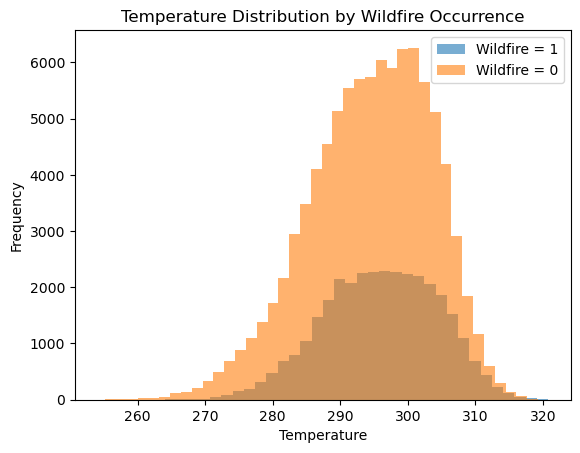

In [ ]:
plt.hist(full_data[full_data['Wildfire_bin'] == 1]['tmmx_mean_rt_50_59'], bins=40, alpha=0.6, label='Wildfire = 1')
plt.hist(full_data[full_data['Wildfire_bin'] == 0]['tmmx_mean_rt_50_59'], bins=40, alpha=0.6, label='Wildfire = 0')

plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Distribution by Wildfire Occurrence")
plt.legend()
plt.show()

In [ ]:
full_data['baseline_pred_season'] = (full_data['season'] == 'Summer').astype(int)
accuracy = accuracy_score(full_data['Wildfire_bin'], full_data['baseline_pred_season'])
precision = precision_score(full_data['Wildfire_bin'], full_data['baseline_pred_season'])
recall = recall_score(full_data['Wildfire_bin'], full_data['baseline_pred_season'])
f1 = f1_score(full_data['Wildfire_bin'], full_data['baseline_pred_season'])
print("Baseline Model Statistics with Season as the parameter on FULL Data")
print("Baseline Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Baseline Model Statistics with Season as the parameter on FULL Data
Baseline Accuracy: 0.5841166421675738
Precision: 0.25430653988751295
Recall: 0.3068659078458823
F1 Score: 0.2781248707021391


Confusion Matrix with Season as the parameter on FULL Data:
 [[63431 29566]
 [22775 10083]]


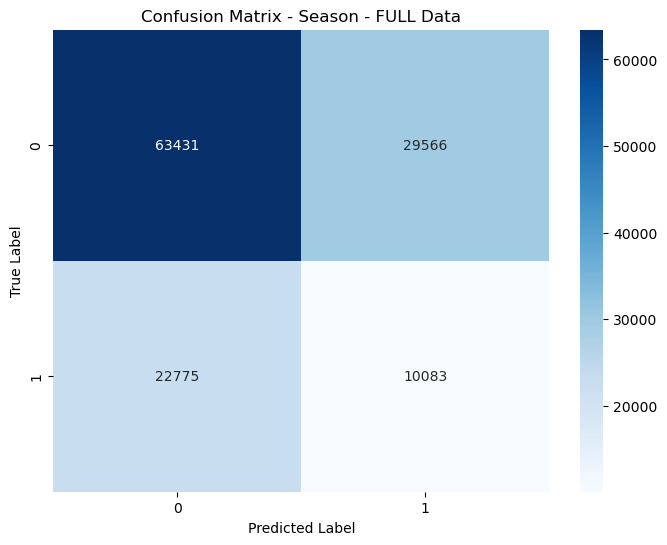

In [ ]:
cm = confusion_matrix(full_data['Wildfire_bin'], full_data['baseline_pred_season'])
print("Confusion Matrix with Season as the parameter on FULL Data:\n", cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Season - FULL Data')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
test_data['baseline_pred_season'] = (test_data['season'] == 'Summer').astype(int)
accuracy = accuracy_score(test_data['Wildfire_bin'], test_data['baseline_pred_season'])
precision = precision_score(test_data['Wildfire_bin'], test_data['baseline_pred_season'])
recall = recall_score(test_data['Wildfire_bin'], test_data['baseline_pred_season'])
f1 = f1_score(test_data['Wildfire_bin'], test_data['baseline_pred_season'])
print("Baseline Model Statistics with Season as the parameter on TEST Data")
print("Baseline Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Baseline Model Statistics with Season as the parameter on TEST Data
Baseline Accuracy: 0.45728384907988073
Precision: 0.5718424101969872
Recall: 0.2619890284905326
F1 Score: 0.35934466019417477


Confusion Matrix with Season as the parameter on TEST Data:
 [[5935 2217]
 [8341 2961]]


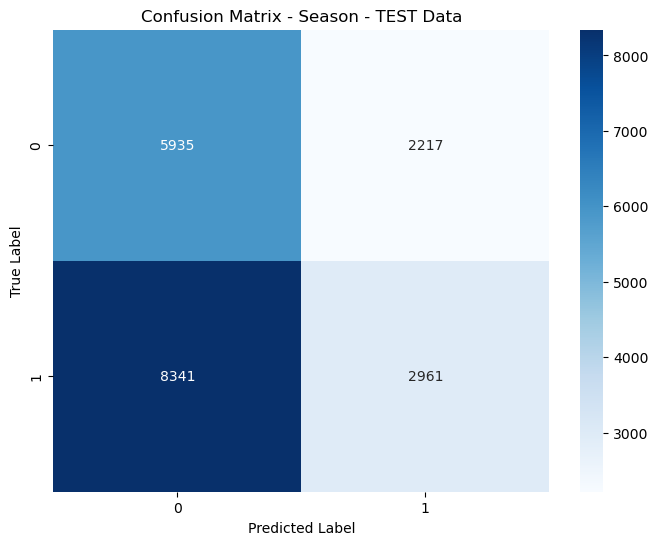

In [ ]:
cm = confusion_matrix(test_data['Wildfire_bin'], test_data['baseline_pred_season'])
print("Confusion Matrix with Season as the parameter on TEST Data:\n", cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Season - TEST Data')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()